Intervalos de confianza para una distribución normal
==================

In [46]:
import scipy.stats
import numpy as np
from matplotlib import pyplot as plt

1


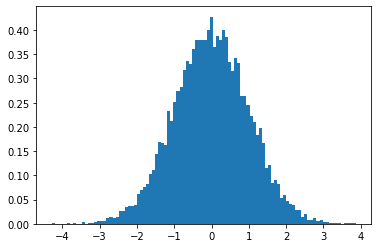

In [47]:
# Histograma de 10000 muestras de una N(0,1)
x=np.random.normal(0,1,10000)
plt.hist(x,bins=100,density=True)
print(1)

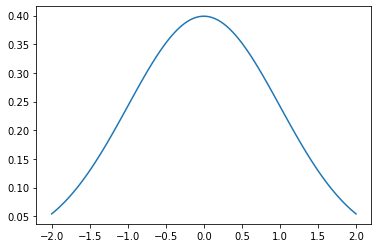

In [30]:
# Valores exactos de una N(0,1)
x=np.linspace(-2,2,100)
Px=scipy.stats.norm.pdf(x,0,1) # pdf: probability density function
plt.plot(x,Px)

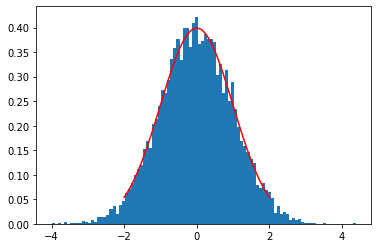

In [33]:
# Mezclando ambos gráficos

x=np.random.normal(0,1,10000)
plt.hist(x,bins=100,density=True)

x=np.linspace(-2,2,100)
Px=scipy.stats.norm.pdf(x,0,1)
plt.plot(x,Px,color="red")

In [51]:
# Cálculo de valores críticos (z_a/2, za/2)

# Nivel de confianza del 95%
z95=scipy.stats.norm.ppf(0.975,0,1) # ppf: Percent point function
z_95=scipy.stats.norm.ppf(0.025,0,1)

# Nivel de confianza del 90%
z9=scipy.stats.norm.ppf(0.95,0,1)
z_9=scipy.stats.norm.ppf(0.05,0,1)

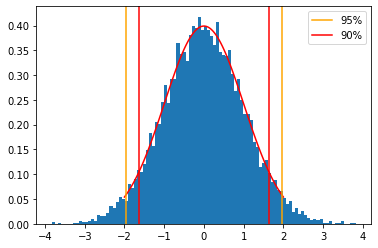

In [53]:
# Gráficos
x=np.random.normal(0,1,10000)
plt.hist(x,bins=100,density=True)

x=np.linspace(-2,2,100)
Px=scipy.stats.norm.pdf(x,0,1)
plt.plot(x,Px,color="red")

# Agregar valores críticos
plt.axvline(x=z95,color="orange",label="95%")
plt.axvline(x=z_95,color="orange")
plt.axvline(x=z9,color="red",label="90%")
plt.axvline(x=z_9,color="red")

plt.legend()

Ejercicio 1
---------

Repetir los gráficos anteriores para una distribución t sabiendo que:
    
```
z95=scipy.stats.t.ppf(0.975,16)
```



Ejercicio 2
----------

Los datos del ejericio vistos en clase:


<img src="https://raw.githubusercontent.com/mrivas/disenoExperimentos/master/datos.png" alt="Drawing" style="width: 700px;" />

Pueden ser escritos como un matriz en numpy

In [45]:
data=np.array([[160,575,542,530,539,570],
               [180,565,593,590,579,610],
               [200,600,651,610,637,629],
               [220,725,700,715,685,710]])

En base a estos calcular los intevalos de confianza de $\mu_1, \mu_2, \mu_3$ e $\mu_4$

In [79]:
def interConf(data):
    n = 5
    a = 4
    N = n*a
    
    for i in range(a):
        y_i = np.mean(data[i,1:6])
        t95=scipy.stats.t.ppf(0.975,N-a)
        t_95 = -t95 # scipy.stats.t.ppf(0.025,N-a)
        
        # Estimador de la varianza
        SSt    = np.sum(np.power( data[:,1:6], 2)) - np.power(np.sum( data[:,1:6]), 2)/N
        
        SStrat = 0
        for j in range(4):
            SStrat +=  np.power( np.sum(data[j,1:6]), 2)
        SStrat = 1/n*SStrat - np.power(np.sum( data[:,1:6]), 2)/N
        
        SSE = SSt - SStrat 
        
        S2 = SSE/(N-a)
        
        # Limites superior
        upper = y_i + t95* np.sqrt(S2/n)
        # Limite inferior
        lower = y_i - t95* np.sqrt(S2/n)
        
        print(i+1,lower,upper)


In [80]:
interConf(data)

1 533.8815284046386 568.5184715953615
2 570.0815284046386 604.7184715953614
3 608.0815284046386 642.7184715953614
4 689.6815284046386 724.3184715953614


In [59]:
np.power( data[:,1:6], 2)

array([[330625, 293764, 280900, 290521, 324900],
       [319225, 351649, 348100, 335241, 372100],
       [360000, 423801, 372100, 405769, 395641],
       [525625, 490000, 511225, 469225, 504100]])

In [65]:
n = 5
a = 4
N = n*a
np.sum(np.power( data[:,1:6], 2)) - np.power(np.sum( data[:,1:6]), 2)/N

72209.75

In [69]:
SStrat = 0
for i in range(4):
    SStrat +=  np.power( np.sum(data[i,1:6]), 2)
SStrat = 1/n*SStrat - np.power(np.sum( data[:,1:6]), 2)/N

In [70]:
SStrat

66870.55000000075